# cJUN Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [2]:
def detect_binding( arr, high_cutoff, low_cutoff ):

    dim = len(arr)

    time_high = 0
    paths = [ ]
    time = 0

    while( time < dim ):

        item = arr[time]

        if( item >= high_cutoff ):

            time_high = time

            counter = 1
            for jtem in arr[time_high+1:]:

                if( jtem >= high_cutoff ):
                    time = time_high + counter - 1
                    break

                elif( jtem <= low_cutoff ):
                    paths.append( [ time_high, time_high + counter ] )
                    time = time_high + counter - 1
                    break

                counter += 1
        time += 1

    return paths

In [3]:
def detect_unbinding( arr, high_cutoff, low_cutoff ):

    dim = len(arr)

    time_low = 0
    paths = [ ]
    time = 0

    while( time < dim ):

        item = arr[time]

        if( item <= low_cutoff ):

            time_low = time

            counter = 1
            for jtem in arr[time_low+1:]:

                if( jtem <= low_cutoff ):
                    time = time_low + counter - 1
                    break

                elif( jtem >= high_cutoff ):
                    paths.append( [ time_low, time_low + counter ] )
                    time = time_low + counter - 1
                    break

                counter += 1
        time += 1

    return paths

In [4]:
def residence_times( dist, unbinding, binding ):
    
    bound_time           = 0
    unbound_time         = 0
    initial_bound_time   = 0
    initial_unbound_time = 0
    n_unbound            = 0
    n_bound              = 0 

    initial = min( unbinding[0][0], binding[0][0] )

    if initial == unbinding[0]:
        initial_bound_time   = initial
        n_bound             += 1
    else:
        initial_unbound_time = initial
        n_unbound           += 1

    unbound_time = initial_unbound_time
    bound_time = initial_bound_time

    i = 0
    for u,b in zip( unbinding, binding ):

        if initial_unbound_time > 0:
            bound_time   += u[0] - b[1]
            unbound_time += binding[i+1][0] - u[1]
        else:
            unbound_time += u[0] - b[1]
            bound_time   += binding[i+1][0] - u[1]

        i += 1

        if i == len(unbinding)-1:
            break

    if initial_unbound_time > 0:
        bound_time   += unbinding[-1][0] - binding[-1][1]
        unbound_time += len(dist) - unbinding[-1][1]  
    else:
        unbound_time += unbinding[-1][0] - binding[-1][1]
        bound_time   += len(dist) - unbinding[-1][1]
        
    n_bound   += len(binding)
    n_unbound += len(unbinding)
    
    # sanity check
    transition_time = 0
    for u,b in zip(unbinding,binding):
        transition_time += (u[1] - u[0]) + (b[1] - b[0])
        
    print(f"# SANITY CHECK: {len(dist) - unbound_time - bound_time - transition_time}")
        
    return unbound_time / n_unbound, bound_time / n_bound

## Load Data

In [5]:
dist = np.genfromtxt( 'temp.dat' )

In [6]:
min_cutoff = 0.8
max_cutoff = 2

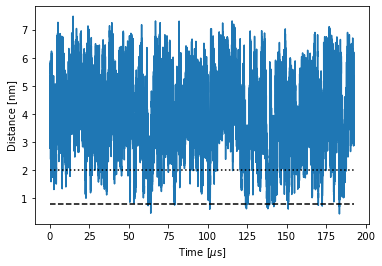

In [7]:
x = dist[:,0]/1e4

plt.plot( x, dist[:,1], zorder = 0 )
plt.hlines( min_cutoff, x[0], x[-1], linestyle = '--', color = 'k', zorder = 10 )
plt.hlines( max_cutoff, x[0], x[-1], linestyle = ':',  color = 'k', zorder = 10 )
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('Distance [nm]')
plt.show()

In [8]:
binding   = detect_binding(   dist[:,1], max_cutoff, min_cutoff )
unbinding = detect_unbinding( dist[:,1], max_cutoff, min_cutoff )

In [9]:
unbound_time, bound_time = residence_times( dist, unbinding, binding )

# SANITY CHECK: 0


In [ ]:
print("Unbound residence time: {unbound_time/1e4}")

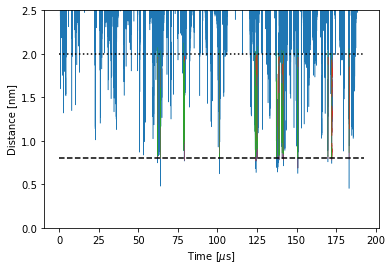

In [49]:
x = dist[:,0]/1e4

plt.plot( x, dist[:,1], zorder = 0, lw = 0.5 )
plt.hlines( min_cutoff, x[0], x[-1], linestyle = '--', color = 'k', zorder = 10 )
plt.hlines( max_cutoff, x[0], x[-1], linestyle = ':',  color = 'k', zorder = 10 )

for u in unbinding:
    x = dist[:,0][u[0]:u[1]]/1e4
    y = dist[:,1][u[0]:u[1]]
    plt.plot( x, y, zorder = 0, c = 'tab:red', lw = 0.5 )
    
for b in binding:
    x = dist[:,0][b[0]:b[1]]/1e4
    y = dist[:,1][b[0]:b[1]]
    plt.plot( x, y, zorder = 0, c = 'tab:green', lw = 0.5 )

plt.ylim((0,2.5))
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('Distance [nm]')
plt.show()